In [1]:
from helita.sim import rh15d

In [2]:
pwd

'/mn/stornext/d18/RoCS/martecw/rh/rh15d/run_project'

In [3]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt


file_path = "/mn/stornext/d18/RoCS/martecw/rh/Atmos/en024048_hion_385.ncdf" #file I want to read from
file = Dataset(file_path, "r") #r for "read"

#Print all the variables in the file:
for i in file.variables:
    print("Variabel: ", i)
print("")

Variabel:  temperature
Variabel:  velocity_z
Variabel:  electron_density
Variabel:  hydrogen_populations
Variabel:  x
Variabel:  y
Variabel:  z
Variabel:  snapshot_number
Variabel:  B_x
Variabel:  B_y
Variabel:  B_z
Variabel:  density



In [4]:
#----------- z = 0 Mm ---------------

"""-----Z HEIGHT-----"""
print("Format of 'height z':  ", file["z"].shape) #the format of the variable
z = file["z"] #units: m
z0 = np.where(z[0,:] == 0)
print("z=0 at index:",z0)
print("   ")

"""-----TEMPERATURE-----"""
print("Format of 'temperature':  ", file["temperature"].shape)
temp = file["temperature"]

"""-----VELOCITY-----"""
print("Format of 'velocity (z)':  ", file["velocity_z"].shape)
vel = file["velocity_z"]

"""-----MAGNETIC FIELD-----"""
print("Format of 'Magnetic field (z)':  ", file["B_z"].shape)
Bz = file["B_z"]

Format of 'height z':   (1, 467)
z=0 at index: (array([416]),)
   
Format of 'temperature':   (1, 504, 504, 467)
Format of 'velocity (z)':   (1, 504, 504, 467)
Format of 'Magnetic field (z)':   (1, 504, 504, 467)


Z=0 Mm at index 416.

In [5]:
#----------- z = 1 Mm ---------------


"""-----Z HEIGHT-----"""
#Find where z=100 0000 (closest to this value):
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

array = z[0,:]
#value = 500000 #m
value = 1e6 #1000000 #m
nearest = find_nearest(array, value)
print("nearest value to 1 Mm: ",nearest)

z_1Mm = np.where(z[0,:] == nearest) #365
print("z=1 Mm at index:",z_1Mm)
print("   ")


"""-----TEMPERATURE-----"""
#Finding the indices of the two points where the temp is highest/lowest at z=1Mm:
low_temp = np.where(temp[0,:,:,365] == np.min(temp[0,:,:,365]))
high_temp = np.where(temp[0,:,:,365] == np.max(temp[0,:,:,365]))
print("index for point where temp is low, (z=1Mm):", low_temp)
print("index for point where temp is high, (z=1Mm):", high_temp)


nearest value to 1 Mm:  1000563.0
z=1 Mm at index: (array([365]),)
   
index for point where temp is low, (z=1Mm): (array([185]), array([425]))
index for point where temp is high, (z=1Mm): (array([381]), array([347]))


In [6]:
#A quick check:

print("max temp [K]:", np.max(temp[0,:,:,365])) #this is max temp
print("min temp [K]:", np.min(temp[0,:,:,365])) #this is min temp
print("index where temp is max:", np.where(temp[0,:,:,365] == np.max(temp[0,:,:,365])))
print("index where temp is min:", np.where(temp[0,:,:,365] == np.min(temp[0,:,:,365])))
print("max temp in this index:", temp[0,381,347,365])
print("min temp in this index:", temp[0,185,425,365])


max temp [K]: 10044.0625
min temp [K]: 2499.5625
index where temp is max: (array([381]), array([347]))
index where temp is min: (array([185]), array([425]))
max temp in this index: 10044.0625
min temp in this index: 2499.5625


 **We also find for 0.5 Mm, and have that:**

Index for point where temp is low, (z=0.5Mm): (array([455]), array([492]))

Index for point where temp is high, (z=0.5Mm): (array([392]), array([354]))

$\newline$

**In keyword.input we write (for 0.5 Mm):**

- For point with lowest temp:

x_start = 455, x_end = 456

y_start = 492, y_end = 493


- For point with highest temp:

x_start = 392, x_end = 393

y_start = 354, y_end = 355


# Reading ATMOS3 atmosphere:

In order to compare the given CO atmosphere with a known atmosphere, we read the ATMOS3 atmosphere used by Wedemeyer-Böhm et al (2005).

In [7]:
"""Read ATMOS3 atmosphere:"""
filepath_ = "/mn/stornext/d18/RoCS/martecw/rh/Molecules_example/CO/atmos3_cut.dat"

data = np.loadtxt(filepath_, dtype=object)
with open(filepath_, "r") as file1:
    list_ = [float(i) for line in file1 for i in line.split('   ') if i.strip()]
    x_data = np.array(list_[::2])
    y_data = np.array(list_[1::2])

# Comparison of wavetables:

We need to find which wavetable is best of *../../Molecules_example/CO/vmax=9_Jmax=120_dv=1_26* and *../../Molecules_example/CO/table13_selected.dat* in CO.molecule, so we compare them, running the *CO atmosphere* using both wavetables for the lowest temperature.

**First run for CO atmosphere in keyword.input using ../../Molecules_example/CO/vmax=9_Jmax=120_dv=1_26 in CO.molecule**

In [8]:
#LOWEST TEMP:
"""
x_start = 455, x_end = 456
y_start = 492, y_end = 493
"""

dpath_low = '/mn/stornext/d18/RoCS/martecw/rh/rh15d/run_project/output_lowtemp3'
data_low = rh15d.Rh15dout(dpath_low)
wave_low = data_low.ray.wavelength

--- Read /mn/stornext/d18/RoCS/martecw/rh/rh15d/run_project/output_lowtemp3/output_aux.hdf5 file.
--- Read /mn/stornext/d18/RoCS/martecw/rh/rh15d/run_project/output_lowtemp3/output_indata.hdf5 file.
--- Read /mn/stornext/d18/RoCS/martecw/rh/rh15d/run_project/output_lowtemp3/output_ray.hdf5 file.


**Then run for CO atmosphere in keyword.input using ../../Molecules_example/CO/table13_selected.dat in CO.molecule**

In [9]:
#LOWEST TEMP:
"""
x_start = 455, x_end = 456
y_start = 492, y_end = 493
"""

dpath_low13 = '/mn/stornext/d18/RoCS/martecw/rh/rh15d/run_project/output_low13'
data_low13 = rh15d.Rh15dout(dpath_low13)
wave_low13 = data_low13.ray.wavelength

--- Read /mn/stornext/d18/RoCS/martecw/rh/rh15d/run_project/output_low13/output_aux.hdf5 file.
--- Read /mn/stornext/d18/RoCS/martecw/rh/rh15d/run_project/output_low13/output_indata.hdf5 file.
--- Read /mn/stornext/d18/RoCS/martecw/rh/rh15d/run_project/output_low13/output_ray.hdf5 file.


Comparing the two wavetables:

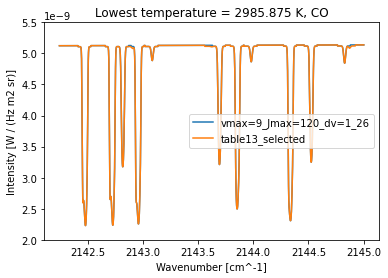

In [41]:
# Plotting:
indices_low = np.arange(len(wave_low))[(wave_low > 4662) & (wave_low < 4668)]
indices_low13 = np.arange(len(wave_low13))[(wave_low13 > 4662) & (wave_low13 < 4668)]
plt.plot(1e7/wave_low[indices_low],data_low.ray.intensity[0,0,indices_low], label="vmax=9_Jmax=120_dv=1_26")
plt.plot(1e7/wave_low13[indices_low13],data_low13.ray.intensity[0,0,indices_low13], label="table13_selected")
plt.title('Lowest temperature = 2985.875 K, CO')
plt.legend()
plt.ylim(2e-9,5.5e-9)
plt.xlabel("Wavenumber [cm^-1]")
plt.ylabel("Intensity [W / (Hz m2 sr)]");

We see that they are quite similiar, but the *../../Molecules_example/CO/table13_selected.dat* wavetable might give a tiny bit more information (very very little, but still a bit), so we choose that one further on.

# Running CO atmosphere for lowest and higest temperature:

**LOWEST TEMPERATURE:**

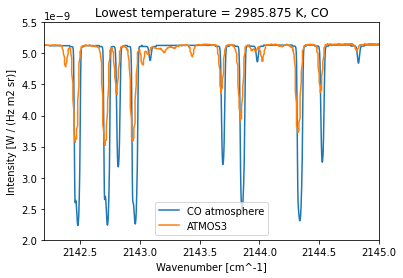

In [42]:
# Plotting:
indices_low = np.arange(len(wave_low))[(wave_low > 4662) & (wave_low < 4668)]
plt.plot(1e7/wave_low[indices_low],data_low.ray.intensity[0,0,indices_low], label="CO atmosphere")
plt.plot(x_data, y_data*np.max(data_low.ray.intensity[0,0,indices_low]).item(), label="ATMOS3")
plt.title('Lowest temperature = 2985.875 K, CO')
plt.legend()
plt.ylim(2e-9,5.5e-9)
plt.xlim(2142.2,2145)
plt.xlabel("Wavenumber [cm^-1]")
plt.ylabel("Intensity [W / (Hz m2 sr)]");

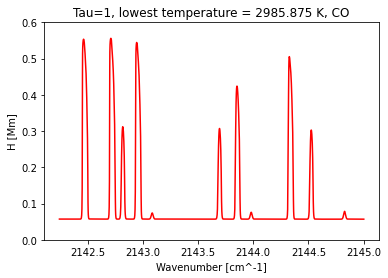

In [43]:
#Tau = 1:
indices_lowtau1 = np.arange(len(wave_low))[(wave_low > 4662 ) & (wave_low < 4668)]
plt.plot(1e7/wave_low[indices_lowtau1],data_low.ray.tau_one_height[0,0,indices_lowtau1]/1e6,color='red')
plt.ylim(0,0.6)
plt.title('Tau=1, lowest temperature = 2985.875 K, CO')
plt.xlabel("Wavenumber [cm^-1]")
plt.ylabel('H [Mm]');

**HIGHEST TEMPERATURE:**

In [13]:
"""
x_start = 392, x_end = 393
y_start = 354, y_end = 355
"""

dpath_high = '/mn/stornext/d18/RoCS/martecw/rh/rh15d/run_project/output_hightemp3'
data_high = rh15d.Rh15dout(dpath_high)
wave_high = data_high.ray.wavelength

--- Read /mn/stornext/d18/RoCS/martecw/rh/rh15d/run_project/output_hightemp3/output_aux.hdf5 file.
--- Read /mn/stornext/d18/RoCS/martecw/rh/rh15d/run_project/output_hightemp3/output_indata.hdf5 file.
--- Read /mn/stornext/d18/RoCS/martecw/rh/rh15d/run_project/output_hightemp3/output_ray.hdf5 file.


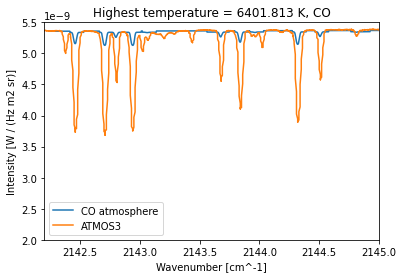

In [45]:
# Plotting:
indices_high = np.arange(len(wave_high))[(wave_high > 4662) & (wave_high < 4668)]
plt.plot(1e7/wave_high[indices_high],data_high.ray.intensity[0,0,indices_high], label="CO atmosphere")
plt.plot(x_data, y_data*np.max(data_high.ray.intensity[0,0,indices_high]).item(), label="ATMOS3")
plt.title('Highest temperature = 6401.813 K, CO')
plt.legend()
plt.xlim(2142.2,2145)
plt.ylim(2e-9,5.5e-9)
plt.xlabel("Wavenumber [cm^-1]")
plt.ylabel("Intensity [W / (Hz m2 sr)]");

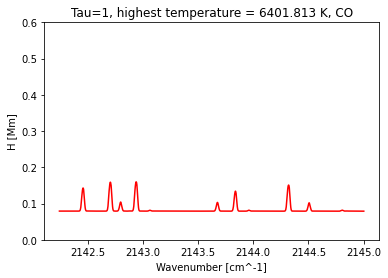

In [47]:
#Tau = 1:
indices_hightau1 = np.arange(len(wave_high))[(wave_high > 4662 ) & (wave_high < 4668)]
plt.plot(1e7/wave_high[indices_hightau1],data_high.ray.tau_one_height[0,0,indices_hightau1]/1e6,color='red')
plt.ylim(0,0.6)
plt.title('Tau=1, highest temperature = 6401.813 K, CO')
plt.xlabel("Wavenumber [cm^-1]")
plt.ylabel('H [Mm]');

# Running FALC atmosphere in keyword.input:

We also want to compare the FALC atmosphere with ATMOS3. Again, we continue to use the wavetable *../../Molecules_example/CO/table13_selected.dat* in CO.molecule, and change to *ATMOS_FILE = ../../Atmos/FALC_82_5x5.hdf5* in keyword.input.

In [16]:
"""
x_start = 0, x_end = 1
y_start = 0, y_end = 1
"""

dpath_FALC = '/mn/stornext/d18/RoCS/martecw/rh/rh15d/run_project/output_FALC3'
data_FALC = rh15d.Rh15dout(dpath_FALC)
wave_FALC = data_FALC.ray.wavelength

--- Read /mn/stornext/d18/RoCS/martecw/rh/rh15d/run_project/output_FALC3/output_aux.hdf5 file.
--- Read /mn/stornext/d18/RoCS/martecw/rh/rh15d/run_project/output_FALC3/output_indata.hdf5 file.
--- Read /mn/stornext/d18/RoCS/martecw/rh/rh15d/run_project/output_FALC3/output_ray.hdf5 file.


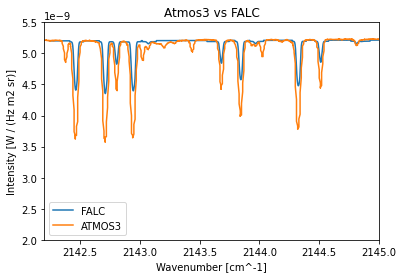

In [48]:
# Plotting:
indices_FALC = np.arange(len(wave_FALC))[(wave_FALC > 4662) & (wave_FALC < 4668)] 
plt.plot(1e7/wave_FALC[indices_FALC],data_FALC.ray.intensity[0,0,indices_FALC], label="FALC")
plt.plot(x_data, y_data*np.max(data_FALC.ray.intensity[0,0,indices_FALC]).item(), label="ATMOS3")
plt.title('Atmos3 vs FALC')
plt.xlim(2142.2,2145)
plt.ylim(2e-9,5.5e-9)
plt.legend()
plt.xlabel("Wavenumber [cm^-1]")
plt.ylabel("Intensity [W / (Hz m2 sr)]");

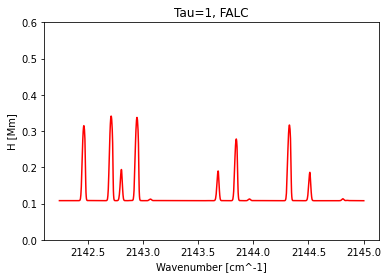

In [49]:
#Tau = 1:
indices_tau1_FALC = np.arange(len(wave_FALC))[(wave_FALC > 4662 ) & (wave_FALC < 4668)]
plt.plot(1e7/wave_FALC[indices_tau1_FALC],data_FALC.ray.tau_one_height[0,0,indices_tau1_FALC]/1e6,color='red')
plt.ylim(0,0.6)
plt.title('Tau=1, FALC')
plt.xlabel("Wavenumber [cm^-1]")
plt.ylabel('H [Mm]');

# Running all 504 points, stepsize = 10:

Then we run all the 504 points in the CO atmosphere with a stepsize=10, find the mean intensity and compare it with ATMOS3. 

In [19]:
"""
x_start = 0, x_end = 504
y_start = 0, y_end = 504
"""

dpath_points = '/mn/stornext/d18/RoCS/martecw/rh/rh15d/run_project/output_10step'
data_points = rh15d.Rh15dout(dpath_points)
wave_points = data_points.ray.wavelength

--- Read /mn/stornext/d18/RoCS/martecw/rh/rh15d/run_project/output_10step/output_aux.hdf5 file.
--- Read /mn/stornext/d18/RoCS/martecw/rh/rh15d/run_project/output_10step/output_indata.hdf5 file.
--- Read /mn/stornext/d18/RoCS/martecw/rh/rh15d/run_project/output_10step/output_ray.hdf5 file.


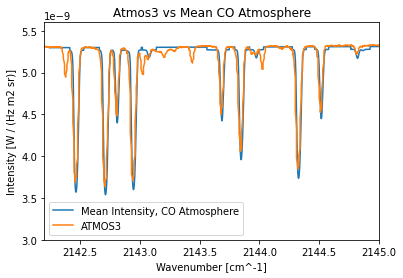

In [50]:
# Plotting:
mean_intensity = np.mean(np.mean(data_points.ray.intensity,axis=1),axis=0) #midlere intensitet

indices_points = np.arange(len(wave_points))[(wave_points > 4662) & (wave_points < 4668)] 
plt.plot(1e7/wave_points[indices_points], mean_intensity[indices_points], label="Mean Intensity, CO Atmosphere") #midlere intensitet
plt.plot(x_data, y_data*np.max(mean_intensity[indices_points]).item(), label="ATMOS3") #atmos3
plt.title('Atmos3 vs Mean CO Atmosphere')
plt.xlim(2142.2,2145)
plt.ylim(3e-9,5.6e-9)
plt.legend()
plt.xlabel("Wavenumber [cm^-1]")
plt.ylabel("Intensity [W / (Hz m2 sr)]");

We then isolate the deepest line in the wavenumber range 2144.1-2144.45, and further choose to look at this line only in order to be consequent. Thus, we want to find the index where the intensity is lowest within this interval, and use imshow to create a plot of the intensity in this point in units *W / (Hz m2 sr)*.

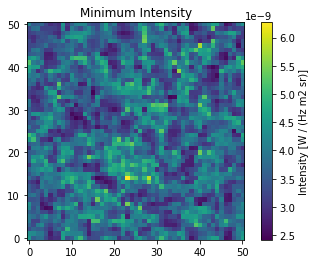

In [21]:
"""Intensity in SI units"""

#Find index where intensity is lowest:
intensity = mean_intensity
indices = np.arange(len(wave_points))[(1e7/wave_points > 2144.1) & (1e7/wave_points < 2144.45)] #isolate one line
min_intensity = np.where(intensity[indices] == np.min(intensity[indices]))
ind0 = indices[min_intensity].item() #1477

int_centrum = data_points.ray.intensity[:,:,ind0]
plt.imshow(int_centrum, origin='lower')
plt.title("Minimum Intensity")
cbar = plt.colorbar(plt.imshow(int_centrum, origin='lower'))    # Inserting the colorbar
cbar.set_label("Intensity [W / (Hz m2 sr)]",size=10)            # Setting label of colorbar
plt.show()


In order to be able to compare this mean intensity with the temperature, we find the intensity in kelvin (brightness temperature). We have been given the intensity expressed with frequency, so we use this equation to calcualte the brightness temperature:

\begin{align}
T_b = \frac{h \nu}{k_B} ln^{-1} \Big( 1 + \frac{2h \nu^3}{I_{\nu}c^2} \Big),
\end{align}

As before, we then isolate one line, find the mean brightness tempearture, the index where the $T_b$ is lowest, and use imshow to create a plot of $T_b$ in this point.

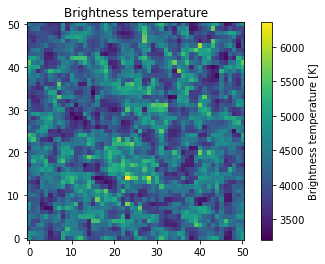

In [22]:
"""Intensity --> Brightness Temperature [K]"""


from astropy import units
from astropy import constants
c = constants.c            # speed of light, m/s
k_B = constants.k_B        # Boltzmann constant, J/K
h = constants.h            # Planck constant, Js


#Calculate brightness temperature:
def T_b(wave, I):   #wave in unit nm, Intensity in unit W/Hz m2 sr
    nu = c*1e9/wave #unit /s
    T_brightness = (h*nu / k_B) * (np.log(1 + (2*h*(nu**3) / (I*(c**2)))))**(-1)
    return T_brightness


T_bright = T_b(wave_points[ind0],int_centrum)

# Plot brightness temperature:
plt.imshow(T_bright, origin='lower')
plt.title("Brightness temperature")
cbar = plt.colorbar(plt.imshow(T_bright, origin='lower'))    # Inserting the colorbar
cbar.set_label("Brightness temperature [K]",size=10)         # Setting label of colorbar
plt.show()


Now we can compare this plot with a plot of the temperature at height where tau=1.

In [23]:
#Compare with temperature at tau=1
from scipy.interpolate import interp1d

tau1_points = data_points.ray.tau_one_height[:,:,ind0] #define tau1 from new data points, m
tau1_temp = np.zeros((len(tau1_points[:,0]),len(tau1_points[0,:])))  #(51,51)
tg = data_points.atmos.temperature       #temp in used range
height_ = data_points.atmos.height_scale #height in used range


for i in range(len(tau1_points[:,0])):     #51
    for j in range(len(tau1_points[0,:])): #51
        
        f = interp1d(height_[i,j,:],tg[i,j,:])
        tau1_temp[i,j] = f(tau1_points[i,j])


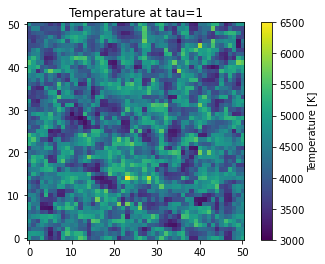

In [24]:
#Plotting:
plt.imshow(tau1_temp, origin='lower', vmin=3000, vmax=6500)
cbar = plt.colorbar(plt.imshow(tau1_temp, origin='lower', vmin=3000, vmax=6500)) # Inserting the colorbar
cbar.set_label("Temperature [K]",size=10)                                        # Setting label of colorbar
plt.title("Temperature at tau=1")
plt.show()

In [25]:
#Animation comparing T_b and temp at tau=1:
from matplotlib.animation import ArtistAnimation
from IPython.display import HTML

fig, ax = plt.subplots(figsize=(5,5))
p = ax.imshow(tau1_temp, origin='lower', vmax=6500, vmin=3000)
q = ax.imshow(T_bright, origin='lower', vmax=6500, vmin=3000)

anim = ArtistAnimation(fig, [[p], [q]], interval=1000, blit=True)
plt.close(fig)
HTML(anim.to_jshtml())

We then look at the line in the same wavenumber interval as before, find the index where tau=1 is maximum and create a plot using imshow.


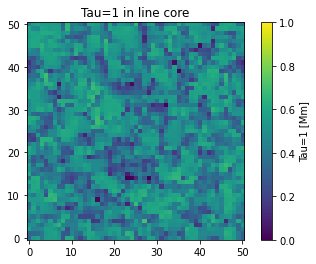

In [26]:
#Imshow of tau=1 in line core:
plt.imshow(tau1_points*1e-6, origin='lower', vmin=0, vmax=1)
plt.title("Tau=1 in line core")
cbar = plt.colorbar(plt.imshow(tau1_points*1e-6, origin='lower', vmin=0, vmax=1))   # Inserting the colorbar
cbar.set_label("Tau=1 [Mm]",size=10)                                                # Setting label of colorbar
plt.show()

In [27]:
#Animation comparing T_b and tau=1 in line core:

fig, ax = plt.subplots(figsize=(5,5))
p = ax.imshow(tau1_points*1e-6, origin='lower', vmin=0, vmax=1)
q = ax.imshow(T_bright, origin='lower')

anim = ArtistAnimation(fig, [[p], [q]], interval=1000, blit=True)
plt.close(fig)
HTML(anim.to_jshtml())

# Find the absolute minimum temperature in range 0.5-1Mm:
How low temperature can we find in the step=10 data we have?

In [28]:
tg_cold = np.where(tg==np.min(tg[:,:,365:390])) #365=index for 1Mm, 390=index for 0.5Mm
print("The lowest detected tempearture in range 0.5-1Mm:")
print(tg[49,39,365])

The lowest detected tempearture in range 0.5-1Mm:
<xarray.DataArray 'temperature' ()>
array(2499.75)
Coordinates:
    x        float64 2.333e+07
    y        float64 -1.857e+07
Attributes:
    units:    K


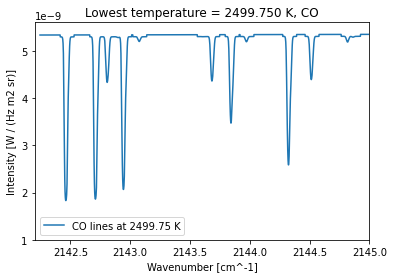

In [52]:
#Absolute lowest detected temperature in the height range 0.5Mm-1Mm (365:390) = 2499.75 K:
int_lowest = data_points.ray.intensity[49,39,indices_points]

# Plotting:
plt.plot(1e7/wave_points[indices_points], int_lowest, label="CO lines at 2499.75 K")
plt.title('Lowest temperature = 2499.750 K, CO')
plt.xlim(2142.2,2145)
plt.ylim(1e-9,5.6e-9)
plt.legend()
plt.xlabel("Wavenumber [cm^-1]")
plt.ylabel("Intensity [W / (Hz m2 sr)]");

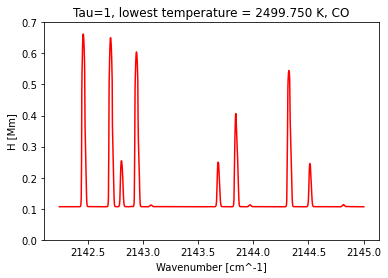

In [53]:
#Tau = 1:
plt.plot(1e7/wave_points[indices_points],data_points.ray.tau_one_height[49,39,indices_points]/1e6,color='red')
plt.ylim(0,0.7)
plt.title('Tau=1, lowest temperature = 2499.750 K, CO')
plt.xlabel("Wavenumber [cm^-1]")
plt.ylabel('H [Mm]');

We then isolate the deepest line in the wavenumber range 2142.3-2142.6, as this seems to be the absolute deepest line. We then find the index where the intensity is lowest within this interval, i.e. in the line core, and use imshow to create a plot of the intensity in this lowest point in units W / (Hz m2 sr).

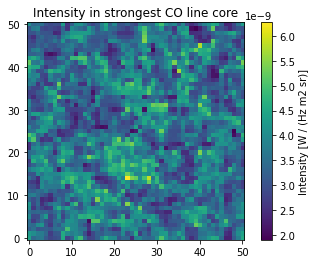

In [32]:
#Isolate the first, lowest line and find the brightness temperature here:
indices_lowline = np.arange(len(wave_points))[(1e7/wave_points > 2142.3) & (1e7/wave_low < 2142.6)] #isolate first line
min_int = np.where(int_lowest[indices_lowline] == np.min(int_lowest[indices_lowline])) #find lowest point/intensity
ind_minimum = indices_lowline[min_int].item() #5527

int_linecore = data_points.ray.intensity[:,:,ind_minimum]
plt.imshow(int_linecore, origin='lower')
plt.title("Intensity in strongest CO line core")
cbar = plt.colorbar(plt.imshow(int_linecore, origin='lower'))   # Inserting the colorbar
cbar.set_label("Intensity [W / (Hz m2 sr)]",size=10)            # Setting label of colorbar
plt.show()

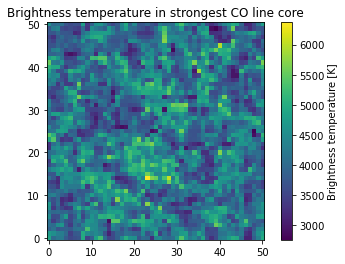

Lowest brightness temperature: <xarray.DataArray ()>
array(2761.95457089)
Coordinates:
    wavelength  float64 4.668e+03


In [56]:
#Then we calculate the brightness temperature in the same point:
Tb_lowest = T_b(wave_points[ind_minimum],int_linecore)

# Plot brightness temperature:
plt.imshow(Tb_lowest, origin='lower')
plt.title("Brightness temperature in strongest CO line core")
cbar = plt.colorbar(plt.imshow(Tb_lowest, origin='lower'))   # Inserting the colorbar
cbar.set_label("Brightness temperature [K]",size=10)         # Setting label of colorbar
plt.show()
print("Lowest brightness temperature:", np.min(Tb_lowest))

In [34]:
#Compare with temperature at tau=1

tau1_min = data_points.ray.tau_one_height[:,:,ind_minimum]
tau1_temp_ = np.zeros((len(tau1_min[:,0]),len(tau1_min[0,:])))  #(51,51)

for i in range(len(tau1_min[:,0])):     #51
    for j in range(len(tau1_min[0,:])): #51
        
        f_ = interp1d(height_[i,j,:],tg[i,j,:])
        tau1_temp_[i,j] = f_(tau1_min[i,j])

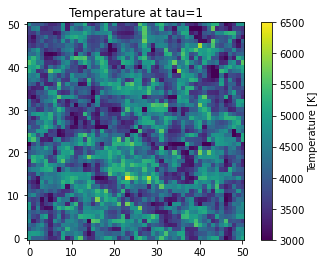

Lowest temperature at tau=1: 2678.631591796875


In [57]:
#Plotting:
plt.imshow(tau1_temp_, origin='lower', vmin=3000, vmax=6500)
cbar = plt.colorbar(plt.imshow(tau1_temp_, origin='lower', vmin=3000, vmax=6500)) # Inserting the colorbar
cbar.set_label("Temperature [K]",size=10)                                         # Setting label of colorbar
plt.title("Temperature at tau=1")
plt.show()
print("Lowest temperature at tau=1:",np.min(tau1_temp_))

In [36]:
#Animation comparing T_b and temp at tau=1:

fig, ax = plt.subplots(figsize=(5,5))
p = ax.imshow(tau1_temp_, origin='lower', vmax=6500, vmin=3000)
q = ax.imshow(Tb_lowest, origin='lower', vmax=6500, vmin=3000)

anim = ArtistAnimation(fig, [[p], [q]], interval=1000, blit=True)
plt.close(fig)
HTML(anim.to_jshtml())

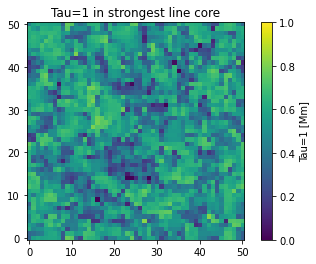

In [37]:
#Imshow of tau=1 in deepest line core:
plt.imshow(tau1_min*1e-6, origin='lower', vmin=0, vmax=1)
plt.title("Tau=1 in strongest line core")
cbar = plt.colorbar(plt.imshow(tau1_min*1e-6, origin='lower', vmin=0, vmax=1))   # Inserting the colorbar
cbar.set_label("Tau=1 [Mm]",size=10)                                             # Setting label of colorbar
plt.show()

In [38]:
#Animation comparing T_b and tau=1 in line core:

fig, ax = plt.subplots(figsize=(5,5))
p = ax.imshow(tau1_min*1e-6, origin='lower', vmin=0, vmax=1)
q = ax.imshow(Tb_lowest, origin='lower')

anim = ArtistAnimation(fig, [[p], [q]], interval=1000, blit=True)
plt.close(fig)
HTML(anim.to_jshtml())